<a href="https://colab.research.google.com/github/itchyfeet-patient/Beautiful-Exploration/blob/master/Exploration_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ⛳ 평가항목 루브릭    

|**평가문항**|**상세기준**|
|----|----|
|1. 3가지 데이터셋의 구성이 합리적으로 진행되었는가?|feature와 label 선정을 위한 데이터 분석과정이 체계적으로 전개됨|
|2. 3가지 데이터셋에 대해 각각 5가지 모델을 성공적으로 적용하였는가?|모델학습 및 테스트가 정상적으로 수행되었음|
|3. 3가지 데이터셋에 대해 모델의 평가지표가 적절히 선택되었는가?|평가지표 선택 및 이유 설명이 타당함|

# 프로젝트 (1) load_digits : 손글씨를 분류해 봅시다

## (1) 필요한 모듈 import하기

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 경고 메시지를 숨김

%matplotlib inline 

## (2) 데이터 준비

In [ ]:
# 데이터 준비
digits = load_digits()
digits.keys() # digits 데이터의 확인

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

'data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR' 총 7개의 데이터가 있네요 

## (3) 데이터 이해하기

> ### Feature Data 지정하기

In [ ]:
digits_data = digits.data # 데이터 불러와서 저장해둠

>### Label Data 지정하기

In [ ]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]
# 정답 데이터는 말 그대로 무슨 숫자의 이미지인지? 1은 1, 4는 4 표기한 것입니당

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
digits_df = pd.DataFrame(data=digits_data, columns = digits.feature_names)

digits_df.head()
# 보기좋게 dataframe으로 바꿔서 각 feature의 내용물을 확인해 봅니다.

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


> ### Target Names 출력해 보기


In [ ]:
digits.target_names
# 0~9 의 숫자를 맞혀야 하기 때문에

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

> ### 데이터 Describe 해 보기

In [ ]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

왜 8*8 인 걸까요? ~(뒤에나옴)~

In [ ]:
print('전체 데이터 건수:', len(digits_df))
print('컬럼별 결측치 개수')
len(digits_df) - digits_df.count()

전체 데이터 건수: 1797
컬럼별 결측치 개수


pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_3    0
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
Length: 64, dtype: int64

In [ ]:
digits_df.isnull().values.any()

False

결측치는 없는 것 같네요.

In [ ]:
digits_data = digits.data
digits_data.shape

(1797, 64)

데이터는 1797 * 64 의 배열로 이뤄져 있네요.

In [ ]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

손글씨 데이터는 이미지 데이터입니다. 따라서 각 숫자는 픽셀값을 의미합니다.       
길이 64의 숫자 배열은 사실 (8 x 8) 크기의 이미지를 일렬로 쭉 펴놓은 것입니다.

그렇다면 1797개의 뭔지 모르는 (이제 분류해서 무슨 숫자인지 예측할) 숫자 데이터가 각각 64개의 숫자 배열(픽셀값)을 갖고 있는거네요? 이미지로 살펴봅시다.

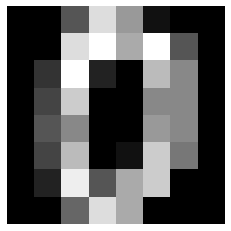

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray', )

plt.axis('off')
plt.show()

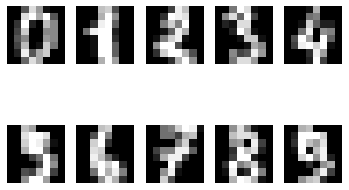

In [ ]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

matplotlib의 `.imshow` 메소드는 array의 값들을 색으로 환산해 이미지의 형태로 보여줍니다. 

## (4) train, test 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437,), (360,))

tr, test 데이터를 20% 비율로 나눠주고 각각의 배열 구조를 보니 잘 나눠짐을 확인할 수 있습니다.

## (5) 다양한 모델로 학습시켜보기

* 여기서 0-9 값 하나하나에 대해 y_test와 y_pred를 시각화 해 보니 직관적으로 보이지 않았습니다.
* 그래서 저는 range()에 y_test의 갯수를 넣어주었습니다. 총 360개므로 0-359번째의 데이터가 차례대로 y_test, y_pred 값을 점찍는 그래프가 그려졌습니다.

> ### randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       0.92      0.97      0.94        34
           4       0.90      0.97      0.94        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.81      0.90        43
           9       0.94      0.91      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



- class 8의 recall = 0.81
    - 실제 8번인 데이터 중의 81%만 8번이라고 예측되었다.
- 나머지는 평이한 수준. 2번은 다맞춤. 

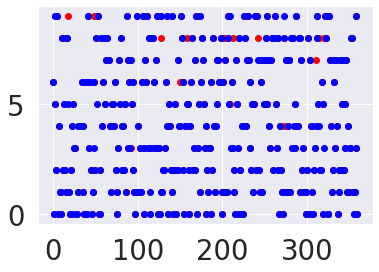

In [ ]:
values = range(360)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

> ### SVM

In [ ]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



- 정확도 99%고 모든 지표가 높게 나왔다.    
- 그래도 말 해보자면 class 5은 precision값이 93%로, 5라고 예측한 데이터의 93%가 실제로 5였다고 볼 수 있다.
- 그리고 class 8은 recall값이 93%로 실제 8인 데이터의 93%가 8로 판별되었음을 알 수 있다.

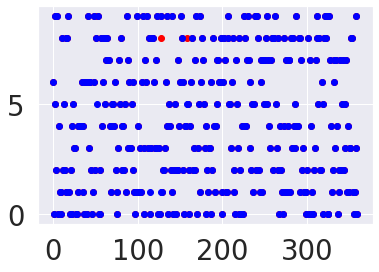

In [ ]:
values = range(360)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

확실히 정확도가 99%라서 붉은 y_test값이 압도적으로 적게 보이는 것을 알 수 있습니다.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.75      0.79      0.77        42
           2       0.77      0.82      0.80        40
           3       0.84      0.91      0.87        34
           4       0.83      0.92      0.87        37
           5       0.90      0.96      0.93        28
           6       0.90      0.93      0.91        28
           7       0.90      0.82      0.86        33
           8       0.90      0.63      0.74        43
           9       0.74      0.81      0.78        32

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.85      0.85      0.85       360



- 일단 정확도가 85%로 가장 낮다.
- class 8에 대한 recall값이 0.63으로 꽤 낮은 편이다.
    - 실제 8번인 데이터 중의 63%만 8번이라고 예측되었다.
    - recall을 중요하게, 그러니까 8번인데 다른 번호라고 예측하는 것을 꺼리는 상황에는 Decision Tree 모델을 사용하지 않는 것이 좋아 보인다.

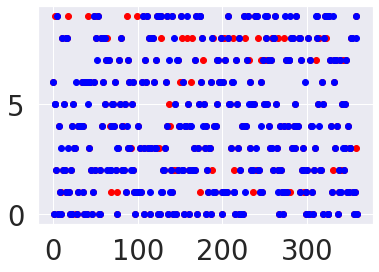

In [ ]:
values = range(360)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

정확도가 85%라 붉은 점 y_test값이 비교적 많이 보이는 것을 볼 수 있습니다.

> ### SGD Classifier

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.80      0.93      0.86        42
           2       0.98      1.00      0.99        40
           3       0.97      0.88      0.92        34
           4       0.93      1.00      0.96        37
           5       0.93      1.00      0.97        28
           6       0.96      0.93      0.95        28
           7       0.94      0.97      0.96        33
           8       1.00      0.77      0.87        43
           9       0.91      0.91      0.91        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



- 정확도는 95%이다.
- class 3의 recall = 0.85
    - 실제 3번인 데이터 중의 85%만 3번이라고 예측되었다.  

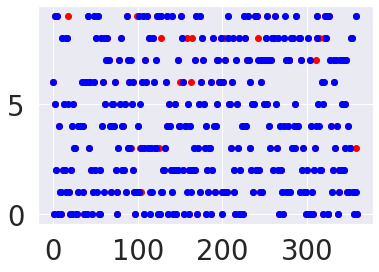

In [ ]:
values = range(360)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

> ### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



- 정확도는 95%이다.
- class 8의 recall값이 0.81이다.
    - 실제 8번인 데이터 중 81%만 8번이라고 예측.

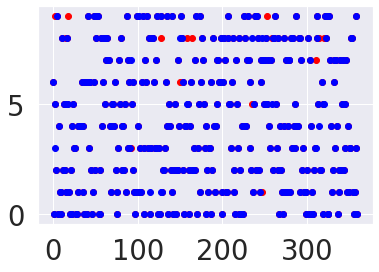

In [ ]:
values = range(360)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

## (6) 모델을 평가해 보기

* SVM 모델이 **99%로 가장 정확도가 높았다**.    
    정확도만으로 판단하면 안 되므로 precision값과 recall값, f-1 score 값을 각각 비교해 보았다.
    * Precision : 단 두개의 class에서만 95%, 93%가 나왔다.
    * recall : 다른 클래스지만 이것도 단 두개의 class에서만 93%, 97%가 나옴.
    * f1-score : 일단 정밀도와 재현율의 조화 평균인데, 불균형한 데이터에서 중요하다고 한다. 이 값이 높으면 모델의 성능이 높다고 할 수 있다.   
    SVM은 f1-score가 0.96~1.00 사이의 값을 가지므로 accuracy 0.99와 비슷함을 알 수 있다. **좋은 모델!**

* 이 분류 문제는 숫자를 최대한 맞추는 것이 목표라고 생각해서 **recall을 더 우선**시 했다.
    * 숫자를 최대한 맞추는 것은 정답인데 오답으로 판단하는 경우가 적어야 하는 것이니까? 사실 그렇게 큰 상관은 없어 보인다.
    * 다만, (예송님과 토론결과) 해당 학습을 통해 필적 진위확인을 한다고 했을 때는, 가짜 필적이 내 필적과 비교했을 때 진짜 취급을 받게 된다면 그건 꼭 피해야 하는 상황이니, precision을 우선시 해야 한다고 생각을 했다.



----

# 프로젝트 (2) load_wine : 와인을 분류해 봅시다

## (1) 필요한 모듈 import하기

In [ ]:
import sklearn
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 경고 메시지를 숨김

%matplotlib inline 



## (2) 데이터 준비

In [ ]:
wines = load_wine()
wines.keys()
# type(wines) -> sklearn.utils.Bunch

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

## (3) 데이터 이해하기

> ### Feature Data 지정하기

In [ ]:
wines_data = wines.data
wines_data
# wines_data.size

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

> ### Label Data 지정하기

In [ ]:
wines_label = wines.target
print(wines_label.shape)
wines_label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

target data는 0, 1, 2로 나뉘어 있군요.

> ### Target Names 출력해 보기


In [ ]:
wines.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

고대로 각각의 target name도 0, 1, 2네요.

> ### 데이터 Describe 해 보기


In [ ]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
len(wines.feature_names) # feature 는 13개다!

13

총 13개의 feature로 이뤄져 있음을 알 수 있네요.

In [ ]:
df_wines = pd.DataFrame(data = wines.data, columns = wines.feature_names)
df_wines.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


dataframe으로 바꿔서 한번 출력해 보았습니다.

In [ ]:
wines.data.shape

(178, 13)

178개의 데이터가 13개의 feature를 갖고 있는 모습입니다.

In [ ]:
# df_wines.head()
pd.isnull(df_wines).all()
# 혹시 결측치가 있는가?

alcohol                         False
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                      False
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                 False
hue                             False
od280/od315_of_diluted_wines    False
proline                         False
dtype: bool

하나라도 true가 있으면 true를 반환할 텐데, 결측치가 없으므로 false를 출력해 줍니다.

## (4) train, test 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(wines_data, 
                                                    wines_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

## (5) 다양한 모델로 학습시켜보기


> ### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



정확도가 100%.. ~저 잘 한거 맞나요?~

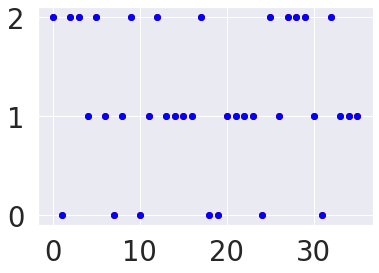

In [ ]:
values = range(36)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

100%라서 y_test값은 표시되지 않고 있습니다.

> ### SVM

In [ ]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



- 정확도가 61%
- 특히 class2의 recall값이 매우 낮습니다. class2에 속하는 와인들을 단 8%만 올바르게 class2로 판별한 것입니다. ~처참~

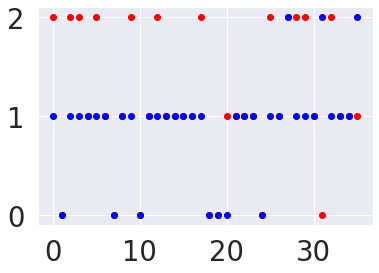

In [ ]:
values = range(36)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

붉은 점이 2에 분포해있는 것을 볼 수 있습니다. 이 모델은 class2를 판별하는 데 약하네요.

> ### 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



- 정확도 92%
- 이 모델도 class2의 recall값이 83%로 낮은 편입니다. 

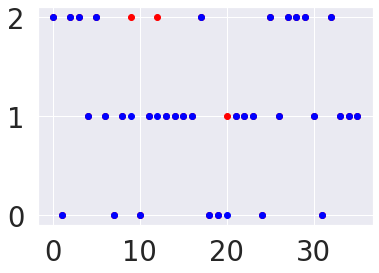

In [ ]:
values = range(36)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

> ### sgd

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.32      1.00      0.48         7
           1       0.79      0.65      0.71        17
           2       0.00      0.00      0.00        12

    accuracy                           0.50        36
   macro avg       0.37      0.55      0.40        36
weighted avg       0.43      0.50      0.43        36



- 정확도 64%
- class2의 precision과 recall값 모두 0%다.
    - sgd 역시 class2 결과가 아쉽습~처참합~니다.
    - class2를 잘 맞추기란 쉽지 않았나 봅니다.

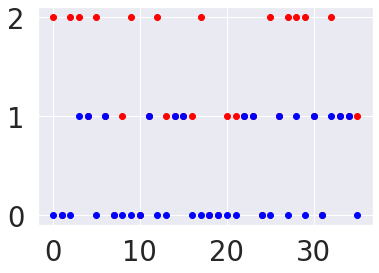

In [ ]:
values = range(36)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

class2부분에는 파란 점(y_pred)이 한개도 없네요.

> ### logistic 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



- 정확도 97%
- logistic 회귀분석 모델도 class2의 recall값이 가장 낮습니다.

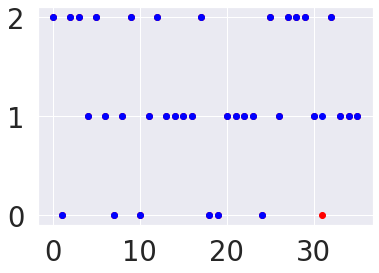

In [ ]:
values = range(36)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

## (6) 모델을 평가해 보기

* 랜덤포레스트 모델이 **100%로 가장 정확도가 높았다**.    
    정확도만으로 판단하면 안 되므로 precision값과 recall값, f-1 score 값을 봤으나 당연하게도 다 100%였다!  
    왕 **좋은 모델!**

* 이 분류 문제는 와인을 분류하는 데 있어서 오답을 정답이라고 하는 것을 피해야 한다고 생각해서 **precision을 더 우선**시 했다.
    * 그래서 만약 의사결정나무(정확도:92%)와 로지스틱 회귀분석(정확도:97%) 중에서 모델을 고른다면 로지스틱 회귀분석에서의 precision값이 더 높았으므로 **로지스틱 회귀분석**을 택하겠다.
    

# 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

## (1) 필요한 모듈 import하기

In [ ]:
# 모듈 import하기
import sklearn
from sklearn.datasets import load_breast_cancer 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2.5)
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 경고 메시지를 숨김

%matplotlib inline 


## (2) 데이터 준비

In [ ]:
bc = load_breast_cancer()
bc.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## (3) 데이터 이해하기

> ### Feature Data 지정하기

In [ ]:
bc_data = bc.data
bc_data
print(bc_data.shape) # (569, 30) 배열인것이야


(569, 30)


569개의 데이터와 30개의 feature를 가졌습니다.   
feature가 이전에 실습해 본 데이터보다 많은 편이네요!

> ### Label Data 지정하기

In [ ]:
bc_label = bc.target
print(bc_label.shape)
bc_label[:] 


(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

악성이냐, 양성이냐 두가지이기 때문에 0, 1로만 이루어진 target data입니다.

> ### Target Names 출력해 보기


In [ ]:
bc.target_names
# [악성, 양성]

array(['malignant', 'benign'], dtype='<U9')

> ### 데이터 Describe 해 보기


In [ ]:
print(bc.feature_names)
print(bc.feature_names.size) # 총 30개임

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [ ]:
bc.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)The mean, standard error, and "worst" or largest (mean of the three worst/largest values) of these features were computed for each image

- 다양한 feature들이 30개 있습니다.
- DESCR 데이터와 구글을 참고하니 유방 종양을 세침흡인세포검사법(FNA)을 이용해  디지털화된 이미지를 토대로 계산된 데이터라고 합니다. 해당 feature들은 이미지에 존재하는 세포 핵의 특성을 설명하는 내용입니다.

In [ ]:
df_bc = pd.DataFrame(data = bc.data, columns = bc.feature_names)
df_bc
df_bc.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
# df_wines.head()
pd.isnull(df_bc).all()
# 혹시 결측치가 있는가?

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
dtype: boo

결측치는 없는 것을 확인할 수 있습니다.

## (4) train, test 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bc_data, 
                                                    bc_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

이번 데이터는 y_test 행이 114개니까 range(114)를 해주겠습니다.

## (5) 다양한 모델로 학습시켜보기


> ### RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=7)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.96      1.00      0.98        74

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



- 정확도 97%
- class0의 recall값이 93%다. 악성을 악성으로 93% 판단했다. 이 말인 즉슨 7%는 악성을 양성으로 판단했다는 뜻..? 
- class 1의 precision값은 96%므로 양성으로 판단한 데이터의 96%가 양성이었다는 뜻. 그러니까 4%는 사실 악성이었다는 뜻..
    - 있어서는 안 될 일이죠?
    - 해당 학습의 목표는 악성을 놓치면 안 되므로 class 0의 recall값이 절대적으로 높아야 합니다. 

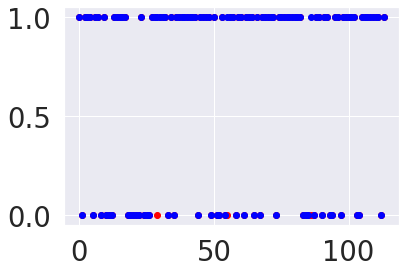

In [ ]:
values = range(114)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

> ### SVM

In [ ]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



- 정확도 90%
- class 0의 recall값이 72%입니다. 28%는 악성인데 양성으로 오판정된 것이므로 좋지 않습니다.

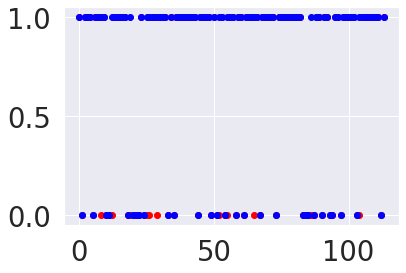

In [ ]:
values = range(114)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

> ### 의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=7)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



- 정확도 91%
- class 0의 recall값이 82%입니다.

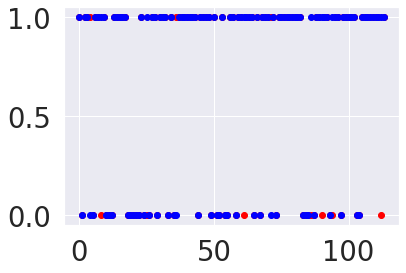

In [ ]:
values = range(114)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

> ### sgd

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



- 정확도 64%
- class 0의 recall값이 100%네요. 적어도 이 모델은 악성을 놓칠 염려는 없어 보입니다.
- 그러나 정확도가 낮고, class 1의 recall값이 45%므로 양성인데 괜히 악성이라고 55% 판단을 해버려서 신뢰도가 굉장히 떨어집니다. 

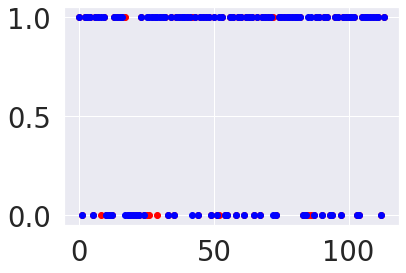

In [ ]:
values = range(114)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

> ### logistic 회귀분석

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

classifier
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        40
           1       0.91      1.00      0.95        74

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



- 정확도 94%
- class 0의 recall값이 82%

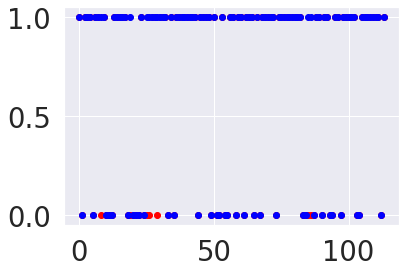

In [ ]:
values = range(114)
plt.scatter(values, y_test, c= "red")
plt.scatter(values, y_pred, c= "blue")
plt.show()

## (6) 모델을 평가해 보기

* 랜덤포레스트 모델이 **97%로 가장 정확도가 높았다.**    
    다만 아쉬운 점은 class 0 의 recall값이 가장 중요한 지표였는데, (악성을 양성으로 판단하는 것이 가장 치명적이므로) recall값이 93%라서 아쉬웠다.
    * 그렇지만 항상 precision값과 recall값은 **트레이드-오프** 관계에 있으므로 어쩔수없다. 
    * 그 예로 sgd 모델을 보면 recall값이 100%로 가장 높은데, 그렇다고 해서 가장 좋은 것도 아니다.    
    class 0의 precision값이 49%고, class 1의 recall값이 45%므로 악성으로 판단한 값 중 49%만이 악성인 것이고 양성인데 양성으로 판단한 값이 45%라는 뜻이므로 **신뢰도**가 굉장히 떨어진다. 
* 결론적으로 당연히 **랜덤포레스트 모델**을 선택하고 싶다. class 0의 recall값이 가장 컸기 때문이다.

---

# 회고

1. 세 개의 분류문제에서 첫번째 문제는 **SVM**, 나머지 두 문제는 **랜덤포레스트**가 정확도가 가장 높았다.
    - 첫번째 문제에서도 랜덤포레스트의 정확도는 꽤 높았기 때문에 랜덤포레스트 모델이 가장 유명한 이유가 있다고 생각했다. 정확한 놈이구나?
2. 그래프 시각화
    - 처음 그래프 그릴 때 X_test 데이터의 첫 번째 컬럼들만 추출해서 x축으로 사용을 했는데 범위가 좁아 한 눈에 y_test, y_pred값이 비교되지 않았다. 어떻게든 고쳐보려고 한 노력 칭찬해🤗    
    근데 range(행 개수)로 x축 값 넣어준 게 괜찮은지? 모르겠다. 물론 더 나은 방법이 있을 것이다. 그런데 각각의 클래스 값으로 하나하나 그래프를 그리자니 한 눈에 들어오질 않아서.. 내가 한 방법이 한번에 보기엔 제일 좋다고 생각했다.
    - 처음에는 사실 막연하게 노드에서 배운 시각화 방법을 썼는데, 해당 노드는 회귀 문제였다. 그래서 0 column이 비교해야할 feature였기 때문에 1:1로 비교 가능했던 것이었음.. 그래서 한 그래프에 다 그리고 싶어 여차저차 하다보니 dimension 에러가 나왔고.. range(행 개수)로 x축 값을 넣어줬던 것이었던 것이었다. Ex.2 하느라 노드를 다시 살펴봤는데 아! 하고 깨달아서 지금 Ex.1 수정하러 왔습니다... 크윽.. 그래도 이번 기회로 많이 찾아보고 많이 배웠다.
    - 산점도 그래프로만 예측값을 비교했는데, 아직 시각화에 대한 지식이 많지 않아서 아쉬웠다. 분명 더 좋은 그래프로 시각화 해서 한 눈에 직관적으로 볼 수 있는 방법이 있을텐데? 노드에서 배웠던 산점도 그래프를 너무 우려먹은 것인지? ㅎㅎ 그런 생각이 들었다. 분류문제에서 한 눈에 들어오는 그래프를 그릴 수 있는 최고의 방법은 뭘까? 어렵다.


1. 처음 캐글 할 때는 ~이걸 내가 어케해~ 라며 생각하기도 했지만, 캐글에서 한 번(이제 두 번), 노드에서 한 번, Ex에서 한 번, 그러면서 반복하고 토론하는 과정에서 굉장히 친해진 것 같다. 누군가 데이터분석에 대해 물으면 아직 난 수정란 🐣 같은 존재겠지만 그래도 조금 알 것 같은 단계로 들어섰다! 
2. 빨리 Ex2 하러 가야함...

---

* 처음에 만들었던 클래스 0-9 각각의 그래프들! 그리기도 힘들고 코드도 너무 길고 한 눈에 들여다 보이지도 않았어요.

![graph_code](https://user-images.githubusercontent.com/108614874/179404508-3f572a37-5f3c-4d81-bd41-50e80176e181.png)

![graph_](https://user-images.githubusercontent.com/108614874/179404493-6539bc65-2b4d-4575-8b4a-552ddc45a5a1.png)


---

>**참고링크**



[1] Precision값과 Recall값 해석 참고 https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html